## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# **1.0 Introduction**

## 1.1 Project Overview

The goal of this project is to conduct an exploratory data analysis (EDA) on movie industry datasets to generate actionable insights for a company launching a new movie studio. With major players in the entertainment industry producing original video content, the company wants to understand which types of films perform best at the box office and why. This project aims to analyze movie data to identify patterns and factors that contribute to a film’s success. By exploring variables such as genre, production budgets, runtimes, release timing, and studio involvement, we aim to uncover actionable insights that will guide the company in making data-informed decisions about the types of movies to produce and release strategies to adopt.

## 1.2 Business Problem

In an effort to diversify and remain competitive, the company is planning on launching a new movie production studio to join the growing trend of original content creation. However, the company currently lacks expertise in the film industry and is uncertain about which types of movies to produce.

To ensure a successful market entry, the leadership needs data-driven insights to guide investment decisions. Specifically, they want to understand what kinds of films are currently performing best at the box office. The primary goal of this analysis is to answer key questions such as:

- Which genres are the most profitable?
- What release months or seasons yield the best box office results?
- Does a director play a key role in the success/profitability the films?
- How does the production studio influence a movie's financial and overall success?
- Are there trends over time in audience preferences or industry performance?

## 1.3 Project Objectives

This project aims to:

- Perform exploratory data analysis (EDA) to identify trends and patterns in the film industry.

- Visualize the film data .

- Highlight key factors contributing to the financial and critical success of films.

- Provide data-driven recommendations to ensure a safe and profitable entry into the industry.



The findings from this project will be valuable to the company and investors in implementing measures to ensure a safe and profitable entry into the film industry.

# **2.0 Data Understanding**

The datasets used for this analysis come from various sources, including IMDB, Box Office Mojo, Rotten Tomatoes, TheMovieDB, and The Numbers. These datasets vary in structure and format (CSV, TSV, SQLite database) and must be cleaned, merged, and analyzed to derive meaningful insights.

## 2.1 Dataset Preview

In [ ]:
#import the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

**1.Rotten Tomato Dataset**

In [ ]:
# Load  2 TSV file
movie_info= pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
reviews=pd.read_csv('data/rt.reviews.tsv.gz', sep='\t',encoding='latin1')

In [6]:
movie_info.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


**2. Box office Dataset**

In [ ]:
box_office = pd.read_csv('data/bom.movie_gross.csv.gz', delimiter=',')

In [20]:
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## 2.2 Data Inspection

We are going to be using a user defined function to give us a summary of the datasets, particularly to obtain the shape,info and description of the dataset.

In [ ]:
# user defined function to get the shape,info and description of the dataset
def explore_dataframe(df, name="DataFrame"): 
    print(f"\n===== {name} Overview =====")
    
    print("\nShape:")
    print(df.shape)
    
    print("\nInfo:")
    print("-" * 40)
    df.info()
    
    print("\nDescription:")
    print("-" * 40)
    print(df.describe(include='all'))

In [ ]:
# calling the function to explore movie_info
explore_dataframe(movie_info, name="Movie Info") 

In [ ]:
# calling the function to explore reviews
explore_dataframe(reviews, name="Reviews") 

In [ ]:
# calling the function to explore box_office
explore_dataframe(box_office, name="Box Office")

## 2.3 Identify missing values

In [ ]:
# Calculate the percentage of missing values in the dataset
missing_percentage = (movie_info.isnull().sum() / len(movie_info)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

In [ ]:
# Calculate the percentage of missing values in the dataset
missing_percentage = (reviews.isnull().sum() / len(reviews)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

# **3.0 Data Preparation**

At this stage , we are going to clean and prepare the datasets for analysis.

## 3.1 Cleaning and the Rotten Tomatoes and Box Office datasets

In [ ]:
# We shall use a user defined function to filling missing values 

def input_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                # If numeric, fill missing values with the median
                df[col].fillna(df[col].median(), inplace=True)
            elif pd.api.types.is_object_dtype(df[col]):
                # If categorical, fill missing values with the mode
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif pd.api.types.is_datetime64_any_dtype(df[col]):
                # If date column, fill missing dates with the most frequent date or median
                df[col].fillna(df[col].mode()[0], inplace=True)
                
    return df

# fill in the missing values in the datasets
movie_info_cleaned = input_missing_values(movie_info)
reviews_cleaned = input_missing_values(reviews)


# Calculate missing percentages
missing_percentage = (movie_info_cleaned.isnull().sum() / len(movie_info_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))


In [ ]:
# Calculate missing percentages
missing_percentage = (reviews_cleaned.isnull().sum() / len(reviews_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

id            0.0
review        0.0
rating        0.0
fresh         0.0
critic        0.0
top_critic    0.0
publisher     0.0
date          0.0
dtype: float64


In [ ]:
# Repeat for the box_office

# Call the function
box_office_cleaned=input_missing_values(box_office)

# Calculate missing percentages
missing_percentage = (box_office_cleaned.isnull().sum() / len(box_office_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

In [ ]:
# Calculate missing percentages
missing_percentage = (box_office.isnull().sum() / len(box_office)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

In [10]:
movie_info_cleaned.shape

(1560, 12)

In [13]:
reviews_cleaned.shape

(54432, 8)

## 3.2 Merge the Rotten tomatoes datasets

In [ ]:
# Merge the two DataFrames on the 'id' column
merged_df = pd.merge(reviews_cleaned, movie_info_cleaned, on='id', how='inner')

# print the merged DataFrame
print(merged_df.head())

## 3.3 Check and handle duplicated entries

In [ ]:
# Check for duplicate rows
duplicates = merged_df.duplicated()

# How many duplicates?
print(f"Number of duplicate rows: {duplicates.sum()}")

# remove duplicate rows
merged_df.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicate rows
duplicates = box_office_cleaned.duplicated()

# How many duplicates?
print(f"Number of duplicate rows: {duplicates.sum()}")

# remove duplicate rows
merged_df.drop_duplicates(inplace=True)

Number of duplicate rows: 0
No duplicate rows found.


In [16]:
merged_df.columns

Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'synopsis', 'rating_y', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime', 'studio'],
      dtype='object')

In [24]:
box_office_cleaned.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

## 3.4 The IMDB SQL Database 

**Inspect to see the database**

In [ ]:
# import the necessary libraries
import zipfile
with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted/')

import sqlite3
conn = sqlite3.connect('extracted/im.db')
cursor = conn.cursor()

In [ ]:
# Obtain all the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


**Check for missing values**

In [ ]:
# We create a user defined function that loops through the tables to check for null values
def check_nulls_in_all_tables(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Get all table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [row[0] for row in cursor.fetchall()]

    for table in tables:
        print(f"\n===== Missing Values in {table} =====")
        df = pd.read_sql(f"SELECT * FROM {table}", conn)
        nulls = df.isnull().mean() * 100
        print(nulls[nulls > 0].sort_values(ascending=False))  # only print columns with missing data

    conn.close()

In [ ]:
check_nulls_in_all_tables('extracted/im.db')

**Cleaning the SQL database**

In [ ]:
import sqlite3  # Import the SQLite3 module for database operations
import pandas as pd  # Import pandas for data manipulation

def clean_db_with_fill_strategy(db_path):
    # Connect to the SQLite database using the provided path
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()  # Create a cursor object to interact with the database

    # Execute SQL query to get all table names in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()  # Fetch the table names from the query result

    # Loop through each table in the database
    for (table,) in tables:
        # Read the entire table into a pandas DataFrame
        df = pd.read_sql(f"SELECT * FROM {table}", conn)
        
        # Calculate the number of missing (null) values in each column
        nulls = df.isnull().sum()
        
        # If there are no missing values in the table, skip to the next table
        if nulls.sum() == 0:
            continue  # Skip if no nulls in the table

        print(f"\nCleaning '{table}'...")  # Print the current table name being cleaned

        # Loop through each column in the DataFrame
        for col in df.columns:
            # Check if the column has any missing values
            if df[col].isnull().sum() > 0:
                # If the column is numeric, fill missing values with the median
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    # If the column is categorical, fill missing values with the mode (most frequent value)
                    if not df[col].mode().empty:
                        df[col].fillna(df[col].mode()[0], inplace=True)

        # Drop duplicate rows from the DataFrame
        df.drop_duplicates(inplace=True)
        print(f"Duplicates dropped in '{table}'.")  # Print a message indicating duplicates were removed

        # Print the number of remaining null values in each column after cleaning
        print(f"Nulls remaining in '{table}':\n{df.isnull().sum()}")
        
        # Optional: Save the cleaned DataFrame back into the database, replacing the old table
        # df.to_sql(table, conn, if_exists="replace", index=False)

    # Close the connection to the database
    # conn.close()

In [ ]:
# Clean the imdb database
clean_db_with_fill_strategy('extracted/im.db')

# **4.0 Data Analysis**

In this section, we will perform exploratory data analysis (EDA) to uncover patterns, trends, and relationships within the dataset. The goal is to derive meaningful insights that will guide our understanding of the movie industry landscape and support business decision-making. We will examine variables such as genre, revenue, production budgets, release dates, and studio performance, using visualizations and descriptive statistics to highlight key findings.

## 4.1 Exploratory Data Analysis (EDA)

>> ## What is the relationship between studios and Box Office performance ?


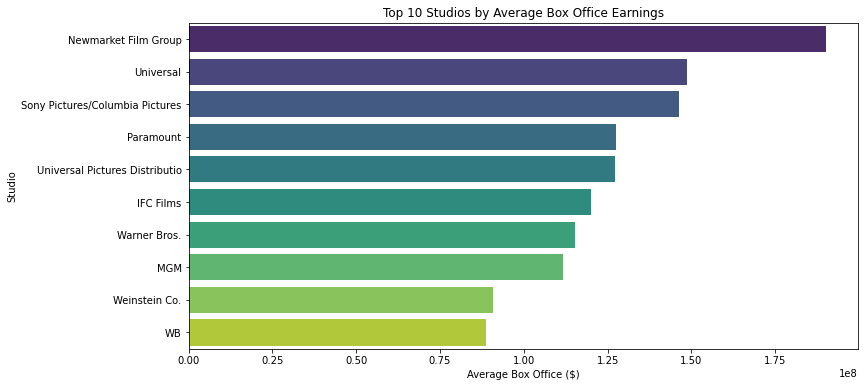

In [31]:
# Remove commas and convert to numeric
merged_df['box_office'] = merged_df['box_office'].replace(',', '', regex=True)
merged_df['box_office'] = pd.to_numeric(merged_df['box_office'], errors='coerce')
# Group by studio and calculate mean
studio_box_office = merged_df.groupby('studio')['box_office'].mean().dropna().sort_values(ascending=False)

# Top 10 Studios
top_10_studios = studio_box_office.head(10)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_studios.values, y=top_10_studios.index, palette="viridis")
plt.title('Top 10 Studios by Average Box Office Earnings')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Studio')
plt.show()



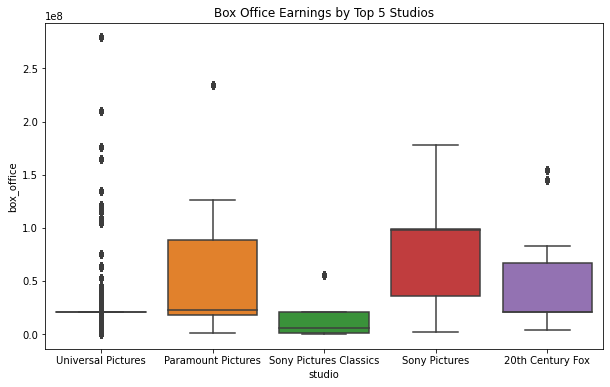

In [32]:
# Find top 5 studios by number of movies
top_studios = merged_df['studio'].value_counts().head(5).index

# Filter dataframe
filtered_df = merged_df[merged_df['studio'].isin(top_studios)]

# Now make the boxplot again
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='studio', y='box_office')
plt.title('Box Office Earnings by Top 5 Studios')
plt.show()



In [33]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
groups = [group['box_office'].values for name, group in merged_df.groupby('studio')]

# Run the ANOVA test
f_stat, p_value = f_oneway(*groups)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 136.53379349295736
P-value: 0.0


The p-value tests the null hypothesis: "All group means are equal."

A p-value close to 0 (technically here it is something like <0.0001) means:

You reject the null hypothesis.

There are statistically significant differences between at least two of the groups.

There is strong evidence to suggest that at least one studio has a significantly different mean box office earnings compared to the others. The results of the ANOVA test confirm that the differences in the average earnings across studios are statistically significant.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total gross
box_office_cleaned['domestic_gross'] = pd.to_numeric(box_office_cleaned['domestic_gross'], errors='coerce') 
# Group by studio
studio_gross = box_office_cleaned.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='rocket')
plt.title('Top 10 Studios by Domestic Gross Revenue', fontsize=16)
plt.xlabel('domestic Gross ($)')
plt.ylabel('Studio')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Null Hypothesis: There is no difference in the medians of domestic gross earnings across studios.

Alternative Hypothesis: There is a difference in the medians of domestic gross earnings across studios.

In [ ]:
from scipy.stats import f_oneway

# Prepare data for ANOVA (grouped by studio)
groups = [group['domestic_gross'].values for name, group in box_office_cleaned.groupby('studio')]

# Perform the One-Way ANOVA
f_stat, p_value = f_oneway(*groups)

# Print the result
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


There is a statistically significant difference in the mean domestic gross earnings between the studios.

At least one studio has a different average domestic gross compared to the others.



>> ## Top Directors vs Box Office Performance

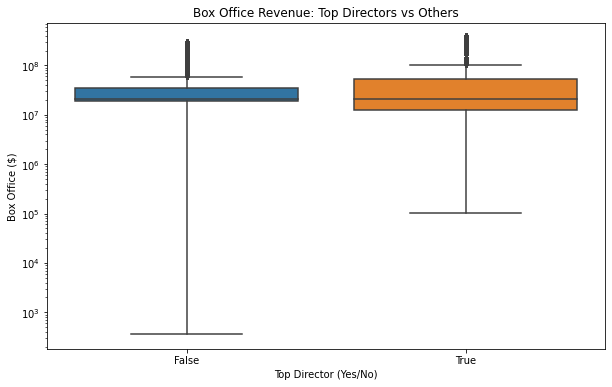

T-statistic: 26.0987, P-value: 0.0000


In [ ]:
# --- 1. SQL Queries ---

# 1.1 Directors and their movies
query_directors = """
SELECT d.movie_id, p.primary_name AS director_name
FROM directors AS d
JOIN persons AS p
ON d.person_id = p.person_id;
"""
directors_df = pd.read_sql_query(query_directors, conn)

# 1.2 Movies and their average ratings
query_ratings = """
SELECT movie_id, averagerating
FROM movie_ratings;
"""
ratings_df = pd.read_sql_query(query_ratings, conn)

# --- 2. Merge Directors with Ratings ---
directors_with_ratings = pd.merge(directors_df, ratings_df, on='movie_id')

# --- 3. Calculate average rating per director ---
director_avg_rating = directors_with_ratings.groupby('director_name')['averagerating'].mean()

# --- 4. Define "top directors" (avg rating >= 7.0) ---
top_directors = director_avg_rating[director_avg_rating >= 7.0].index.tolist()

# --- 5. Mark in merged_df whether movie is by a top director ---
merged_df['is_top_director'] = merged_df['director'].isin(top_directors)

# --- 6. Convert 'box_office' to numeric (if not done already) ---
merged_df['box_office'] = (
    merged_df['box_office']
    .replace('[\$,]', '', regex=True)  # remove $ and commas
    .astype(float)
)

# --- 7. Drop NaN values in 'box_office' before visualization ---
filtered_df = merged_df.dropna(subset=['box_office'])

# --- 8. Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='is_top_director', y='box_office')
plt.title('Box Office Revenue: Top Directors vs Others')
plt.xlabel('Top Director (Yes/No)')
plt.ylabel('Box Office ($)')
plt.yscale('log')  # optional: log scale for better boxplot view
plt.show()

# --- 9. Statistical test (T-test) ---
from scipy import stats

# Split into two groups
top_director_revenue = filtered_df[filtered_df['is_top_director']]['box_office']
other_director_revenue = filtered_df[~filtered_df['is_top_director']]['box_office']

# Perform t-test
t_stat, p_val = stats.ttest_ind(top_director_revenue, other_director_revenue, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


The null hypothesis for this test was that the mean box office revenue for movies by top directors is the same as that of movies by non-top directors.

Since the p-value is essentially 0, we can confidently conclude that the box office earnings for movies directed by top directors are significantly higher than those directed by others.

In [43]:
sql_query = """SELECT 
    p.primary_name AS writer_name,
    AVG(mr.averagerating) AS avg_rating
FROM 
    writers w
JOIN 
    persons p 
ON 
    w.person_id = p.person_id
JOIN 
    movie_ratings mr 
ON 
    w.movie_id = mr.movie_id
GROUP BY 
    p.primary_name
HAVING 
    COUNT(w.movie_id) > 2
ORDER BY 
    avg_rating DESC
LIMIT 10; """
length_rating_df = pd.read_sql(sql_query, conn)


In [44]:
runtime_query = """
SELECT 
    mb.runtime_minutes,
    mr.averagerating
FROM 
    movie_basics mb
JOIN 
    movie_ratings mr 
ON 
    mb.movie_id = mr.movie_id
WHERE 
    mb.runtime_minutes IS NOT NULL
    AND mb.runtime_minutes != '\\N'
    AND mr.averagerating IS NOT NULL
"""
runtime_df = pd.read_sql(runtime_query, conn)

In [45]:
directors_query = """
SELECT 
    p.primary_name AS director_name,
    AVG(mr.averagerating) AS avg_rating
FROM 
    directors d
JOIN 
    persons p 
ON 
    d.person_id = p.person_id
JOIN 
    movie_ratings mr 
ON 
    d.movie_id = mr.movie_id
GROUP BY 
    p.primary_name
HAVING 
    COUNT(d.movie_id) > 2
ORDER BY 
    avg_rating DESC
LIMIT 10;
"""
# Run query
directors_df = pd.read_sql(directors_query, conn)

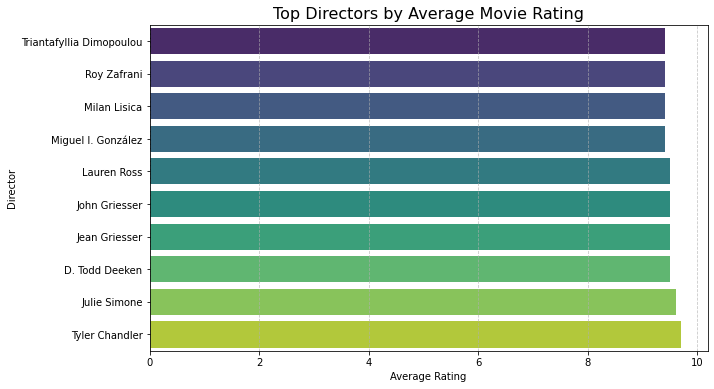

In [46]:

directors_df = directors_df.sort_values('avg_rating', ascending=True)  # Horizontal bar chart

plt.figure(figsize=(10, 6))
sns.barplot(data=directors_df, x='avg_rating', y='director_name', palette='viridis')
plt.title('Top Directors by Average Movie Rating', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

>>>> ## Genre vs Box Office Performance

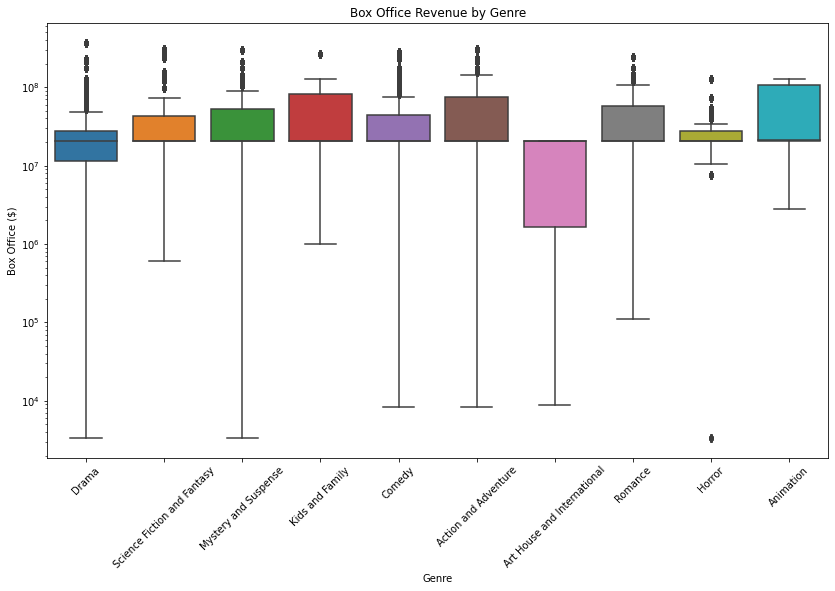

ANOVA F-statistic: 651.8414, P-value: 0.0000


In [36]:
# --- 1. Genre and Box Office Analysis ---

# Handle missing or invalid box office
merged_df['box_office'] = (
    merged_df['box_office']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# Drop missing box office and genre rows
genre_df = merged_df.dropna(subset=['box_office', 'genre']).copy()

# --- 2. Handling multiple genres ---
# Many movies have multiple genres separated by '|'
# We'll explode them so each genre has its own row

genre_df['genre'] = genre_df['genre'].str.split('|')
genre_df = genre_df.explode('genre')

# --- 3. Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
top_genres = genre_df['genre'].value_counts().nlargest(10).index  # top 10 genres
sns.boxplot(data=genre_df[genre_df['genre'].isin(top_genres)], x='genre', y='box_office')
plt.xticks(rotation=45)
plt.yscale('log')  # optional: to handle extreme box office values
plt.title('Box Office Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office ($)')
plt.show()

# --- 4. Statistical Test (ANOVA) ---

from scipy import stats

# Prepare data for ANOVA
anova_data = [genre_df[genre_df['genre'] == genre]['box_office'] for genre in top_genres]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*anova_data)
print(f"ANOVA F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")


There is strong evidence that the mean box office earnings differ significantly across genres. In simpler terms, some genres tend to perform much better than others at the box office.

This result is statistically significant, with a very low p-value indicating that the observed differences are unlikely to have occurred by chance.

In [37]:
# Median box office revenue per genre
genre_medians = genre_df.groupby('genre')['box_office'].median().sort_values(ascending=False)

print(genre_medians.head(10))  # Top 10 genres by median box office


genre
Television                     37442180.0
Animation                      21379315.0
Action and Adventure           20900803.0
Sports and Fitness             20900803.0
Special Interest               20900803.0
Science Fiction and Fantasy    20900803.0
Romance                        20900803.0
Mystery and Suspense           20900803.0
Kids and Family                20900803.0
Horror                         20900803.0
Name: box_office, dtype: float64


# **5.0 Conclusion and Recommendations**

This project analyzed a number of various variables influencing box office success, such as genre, studio, and director status.We applied visual and statistical techniques—such as box plots, t-tests, and ANOVA—to identify which had the strongest relation to high box office profits. These findings can be used for strategic planning purposes for an upcoming movie studio focused on maximizing profitability and competitiveness within the industry.

## 5.1 Business Recommendation

**1. Invest in Top Directors to Boost Revenue Potential** 

The t-test comparing films directed by "top directors" versus others showed a statistically significant difference in box office earnings (T-statistic ≈ 26.10, p-value = 0.0000). This suggests that audiences may be more likely to attend films associated with well-known or critically acclaimed directors. Studios should aim to build long-term relationships with top directors or emerging directors who show consistent box office performance.

**2. Model After High-Performing Studios**

Among the top five studios analyzed, Universal Pictures and Sony Pictures produced films with the highest revenue potential. A new studio could analyze their portfolios, production budgets, and content strategies to learn how to replicate success. Partnering with or hiring experienced executives from these studios could also be advantageous.

**3. Prioritize Animation and Action/Adventure Films**

The analysis revealed that films in the Animation and Action and Adventure genres consistently achieved the highest median and upper-quartile box office returns. Animation, in particular, showed tightly clustered high-performing results with relatively fewer low outliers.

# 5.2 Limitations

**Limited Scope of Variables:** The dataset does not include several critical variables that affect box office success, such as marketing spend, release timing (e.g., holiday vs. off-season), actor popularity, or franchise value.

**Assumption of Independence and Normality:** Statistical tests such as t-tests and ANOVA assume normally distributed data and independence between groups, assumptions that may not hold perfectly given the large variance and potential clustering in the film industry.

**Missing Audience Demographics:** There's no information on who watched the movies—age, gender, region, etc. This limits your ability to analyze trends by target audience or identify underserved markets.

## 5.3 Conclusion

Data-driven analysis of box office success yields useful insights into what works to make films profitable in the movie industry. Some of the key findings include the better box office performance of Animation and Action film genres, the real dollar advantage of retaining star directors, and the consistently high box office performance of experienced studios like Universal Pictures.

But in the film industry, success depends on a subtle combination of quantitative and qualitative factors. While this analysis provides a good foundation, it must be augmented by market research, trend-watching, and creative instinct. As the entertainment terrain evolves further—particularly with the emergence of streaming outlets, global distribution paradigms, and AI-driven content—studios must stay agile, inventive, and highly responsive to audience trends.